# Descripción del Proyecto

EL proyecto se basa en realizar un pronóstico de ventas para RDC, teniendo como input las ventas 2021. Lo que se busca es poder ofrecerle a la empresa, un detalle con predicciones, de cómo van a incrementar/disminuir las ventas, y buscar categorizar por artículo vendido, o bien por los artículos más vendidos. Con el objetivo de seccionar la producción y la estrategia a ese sector particular.

# Data Wrangling

En esta sección, se trabaja con el dataset provisto y se realiza la carga de la base de datos. Tambien se muestra algunas características principales del dataset.

In [1]:
#Importamos las librerias necesarias para el libro
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#Se importa el dataset en formato xlsx con una preview de sus columnas
Ventas = pd.read_excel('Ventas.xlsx')
Ventas.head()

Numero  Articulo FechaDePedido FechaDeEntrega  Cuenta          Localidad  \
0  172893       103    2021-01-06     2021-01-15  5226-0  SANTIAGO DE CHILE   
1  172893       339    2021-01-06     2021-01-15  5226-0  SANTIAGO DE CHILE   
2  172893       424    2021-01-06     2021-01-15  5226-0  SANTIAGO DE CHILE   
3  172893      1757    2021-01-06     2021-01-15  5226-0  SANTIAGO DE CHILE   
4  172893      1773    2021-01-06     2021-01-15  5226-0  SANTIAGO DE CHILE   

           Provincia  LeadTIme                              CatLeadTime  \
0  Santiago de Chile         8  Lead Time Óptimo (5 o más días hábiles)   
1  Santiago de Chile         8  Lead Time Óptimo (5 o más días hábiles)   
2  Santiago de Chile         8  Lead Time Óptimo (5 o más días hábiles)   
3  Santiago de Chile         8  Lead Time Óptimo (5 o más días hábiles)   
4  Santiago de Chile         8  Lead Time Óptimo (5 o más días hábiles)   

   Y_TotalKilos  
0          9360  
1         11232  
2         11232  
3          4500  
4          4500

In [3]:
print(f'La forma del dataset es de ',Ventas.shape[0],' filas y de ', Ventas.shape[1], 'columnas')

La forma del dataset es de  22675  filas y de  10 columnas


In [4]:
#Tipo de dato de cada columna
Ventas.dtypes

Numero                     int64
Articulo                   int64
FechaDePedido     datetime64[ns]
FechaDeEntrega    datetime64[ns]
Cuenta                    object
Localidad                 object
Provincia                 object
LeadTIme                   int64
CatLeadTime               object
Y_TotalKilos               int64
dtype: object

Dado que hay variables categóricas que automáticamente las toma como numéricas, se procede al cambio del tipo de variable

In [5]:
Ventas[['Numero','Articulo']]=Ventas[['Numero','Articulo']].astype(str)


In [6]:
Ventas.dtypes

Numero                    object
Articulo                  object
FechaDePedido     datetime64[ns]
FechaDeEntrega    datetime64[ns]
Cuenta                    object
Localidad                 object
Provincia                 object
LeadTIme                   int64
CatLeadTime               object
Y_TotalKilos               int64
dtype: object

In [7]:
#Totalidad de registros por columnas
Ventas.count()

Numero            22675
Articulo          22675
FechaDePedido     22675
FechaDeEntrega    22675
Cuenta            22675
Localidad         22658
Provincia         22675
LeadTIme          22675
CatLeadTime       22675
Y_TotalKilos      22675
dtype: int64

In [8]:
#Información sobre datos nulos en cada columna
Ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22675 entries, 0 to 22674
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Numero          22675 non-null  object        
 1   Articulo        22675 non-null  object        
 2   FechaDePedido   22675 non-null  datetime64[ns]
 3   FechaDeEntrega  22675 non-null  datetime64[ns]
 4   Cuenta          22675 non-null  object        
 5   Localidad       22658 non-null  object        
 6   Provincia       22675 non-null  object        
 7   LeadTIme        22675 non-null  int64         
 8   CatLeadTime     22675 non-null  object        
 9   Y_TotalKilos    22675 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 1.7+ MB


Se observa que en todas las columnas no existen valores nulos

In [9]:
#Tipo de estructura del dataset
type(Ventas)

pandas.core.frame.DataFrame

In [10]:
#Principales medidas estadisticas
Ventas.describe().T

count         mean           std  min    25%     50%     75%  \
LeadTIme      22675.0     3.208953      4.139663  0.0    1.0     3.0     4.0   
Y_TotalKilos  22675.0  6603.188181  10500.576853  0.0  500.0  1800.0  6552.0   

                   max  
LeadTIme         333.0  
Y_TotalKilos  125000.0

De este análisis podemos obtener las siguientes premisas:
-El promedio de Lead Time es de 3.2 días, es decir desde que se computa el pedido, se tardan mas de 3 días en liberarlo para su despacho.
-El Máx Lead time es de 333 días, nos encontramos con un outlier ya que resulta imposible creer que se tarde casi un año en un pedido
-El promedio de kilos vendidos es de 6603 kilogramos.
-Nos encontramos con valores de kilos vendidos nulos, esto podría estar relacionado con aquellos pedidos con lead time grandes. Se trata de valores erróneos.

In [11]:
#Nombres de las columnas
Ventas.columns

Index(['Numero', 'Articulo', 'FechaDePedido', 'FechaDeEntrega', 'Cuenta',
       'Localidad', 'Provincia', 'LeadTIme', 'CatLeadTime', 'Y_TotalKilos'],
      dtype='object')

Descripción de cada campo:

Numero:	Es el ID. Cada transacción tiene un número, cada número puede contemplar varias compras.

Articulo:Cada producto a vender tiene asociado un artículo que es único. Un cliente puede comprar varios artículos y diferentes kilos. Variable categórica.

FechaDePedido: Fecha en la cual se hace el pedido

FechaDeEntrega: Fecha en la cual se entrega el pedido

Cuenta: ID de cada cliente, tiene una cuenta asociada para mantener la confidencialidad. Variable categórica.

Localidad: Localidad del cliente

Provincia: Provincia del cliente

LeadTIme: Tiempo de ciclo entre que se realiza el pedido y se entrega en días.

CatLeadTime: Categorización del LeadTime, si es óptimo, insuficiente, etc.

Y_TotalKilos: Cantidad de kilos totales vendidos por artículo, por cliente, por transacción.


# Análisis Univariado



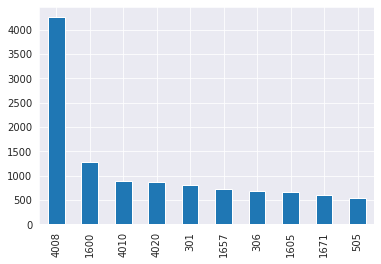

In [12]:
#'Artículo': se realiza un top de conteo de apariciones en el dataset
Ventas['Articulo'].value_counts().head(10).plot.bar()

En este gráfico se observa los productos que más aparecen en la lista por repeticiones y conteo, siendo el art 4008 el que mas transacciones posee

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

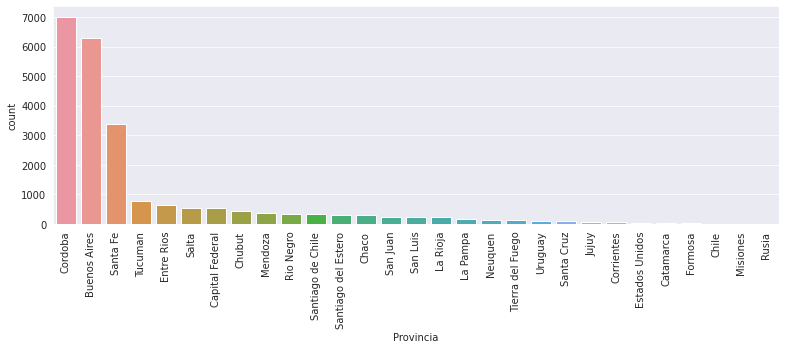

In [13]:
#'Provincia' se categoriza provincia segun la cantidad de apariciones
plt.figure(figsize=(13, 4))
sns.countplot(Ventas.Provincia, order = Ventas.Provincia.value_counts().index)
plt.xticks(rotation=90)

Resulta lógico que Cordoba, el lugar de orígen de la empresa, aparezca como número uno en el que mas transacciones tiene

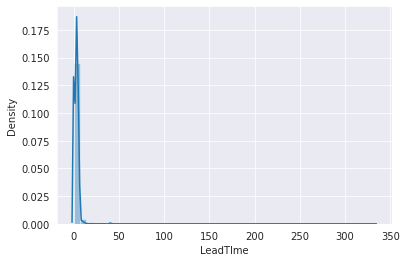

In [14]:
#Distribución de LeadTime
from seaborn import distplot
distplot(Ventas.LeadTIme)

Se puede ver un sesgo a la derecha

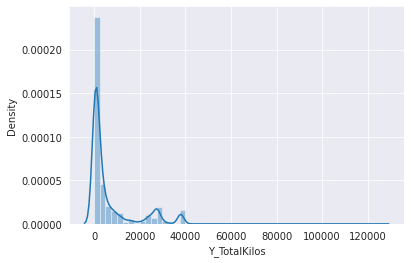

In [15]:
#Y_TotalKilos es el target, se puede ver su densidad
sns.distplot(Ventas['Y_TotalKilos'])

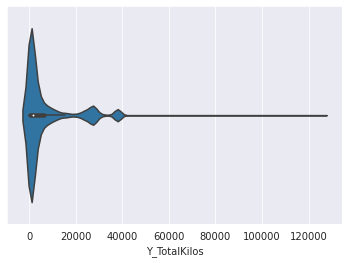

In [16]:
#Y tambien su distribución
from seaborn import violinplot
violinplot(Ventas['Y_TotalKilos'], data=Ventas , orient="v")

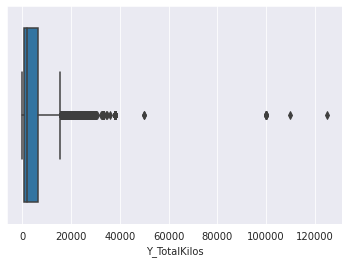

In [17]:
#Diagrama de cajas de YtotalKilos
from seaborn import boxplot
boxplot(Ventas.Y_TotalKilos, orient="v")

De estos gráficos, se puede ver que las ventas mayoritarias son menores a los 20000 kilos, concentrando una densidad importante en los valores cercanos a  3000 kg. Los valores de ventas mayores a 20000 son muy escasos, pero hay dos tendencias concentradas en 30000 y 40000 kilos.

# Analisis Bivariado

In [18]:
#Se instala actualización para que funcione el Data Profiling
!pip3 install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [19]:
!pip install MarkupSafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [20]:
#Data Profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(Ventas)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

De este analisis, es importante destacar que Artículo y Cuenta son variables categóricas. La presencia de ceros en leadtime es totalmente válida, significa que el tiempo de ciclo fue nulo. Y que al parecer no hay un coeficiente de relacion alto entre las dos variables numéricas, LeadTime y Y_TotalKilos

In [21]:
#Análisis de Y_TotalKilos vs Articulo
TOPART=Ventas.groupby('Articulo')['Y_TotalKilos'].mean().sort_values(ascending=False) 
TOPART.head(10)

Articulo
454     105000.000000
453     100000.000000
4020     38000.000000
1800     32750.000000
1501     31875.000000
1801     31636.363636
1803     30582.089552
510      29042.574468
527      29011.494253
503      28750.000000
Name: Y_TotalKilos, dtype: float64

Se puede observar en este TOP 10, que el artículo con mayor kilos de ventas es el 454. Este artículo corresponde a uno de los productos secundarios, harina de carne, utilizado para preparar petfood. El segundo es otro de estos artículos con una característica de formato diferente. Despues en el top 3 aparece levadura en pan, le siguen 4 artículos secundarios relacionado a acidos grasos para ser utilizados como combustible o para preparar tal. Y al final tenemos graneles de grasa bovina, los cuales muchos clientes industriales alimenticios de gran envergadura compran para sus productos.

In [22]:
#Análisis de Y_TotalKilos vs Provincia
TOPPROV=Ventas.groupby('Provincia')['Y_TotalKilos'].mean().sort_values(ascending=False) 
TOPPROV

Provincia
Rusia                  75000.000000
Estados Unidos         36204.545455
Chile                  26000.000000
San Luis               16938.672566
Entre Rios             13519.833600
Jujuy                  12872.627451
Santiago de Chile       9547.941176
Cordoba                 9173.944936
Catamarca               7182.162162
Capital Federal         5838.264925
Buenos Aires            5817.998566
Uruguay                 5713.411765
Tucuman                 4997.092088
Santa Fe                4514.233678
Mendoza                 4054.140056
Chaco                   3475.127148
La Rioja                3370.442478
Salta                   3138.558824
San Juan                2934.718615
Santiago del Estero     1993.526667
Tierra del Fuego        1671.827586
Rio Negro               1548.298246
Chubut                  1430.197183
Santa Cruz              1155.452381
Formosa                 1111.636364
La Pampa                 784.772152
Corrientes               528.196078
Neuquen           

En el análisis de la variable categórica ‘’Provincia’’ vs el target, se obtiene la mayor cantidad de kilos vendidos por provincia. Con la sorpresa de que este dataset incluye algunos valores de países, tales como ‘’Rusia’’ en esta columna. Se puede observar que el TOP es este último, seguido por Estados Unidos.

In [23]:
#Variable Categórica VS Categórica con Artículo y Provincia
pd.crosstab(Ventas.Provincia, Ventas.Articulo)

Articulo             101  102  103  105  1051  1053  1055  1057  1067  108  \
Provincia                                                                    
Buenos Aires         171   77   44   28    62    19   101     0     8   87   
Capital Federal       33    0    0    0     1     0    58     0     1    4   
Catamarca              5    3    0    0     1     0     0     0     0    0   
Chaco                  8    4   11    0     0     0     0     0     0    3   
Chile                  0    0    0    0     0     0     0     0     0    0   
Chubut                 0   26   23    0     0     0     0     0     0   13   
Cordoba               62   74   46   21    49     9    57     1    45   56   
Corrientes             0    1    4    0     0     0     0     0     0    1   
Entre Rios             0    1   12    0     0     2     0     0     0    6   
Estados Unidos         0    0    0    0     0     0     0     0     0    0   
Formosa                0    0    4    0     0     0     0     0     0    0   
Jujuy                  1    3    7    0     0     0     0     0     0    6   
La Pampa               0    8    2    0     0     0     0     0     0    1   
La Rioja              29   22    2    0     1     0     0     0     0    0   
Mendoza                0    1    2    0     7     2     0     0     0    5   
Misiones               0    0    0    0     0     0     0     0     0    0   
Neuquen                0   25   10    0     0     0     0     0     0   11   
Rio Negro              4   12   26    0     1     1     0     0     0   13   
Rusia                  0    0    0    0     0     0     0     0     0    0   
Salta                  8   35   35    0     0     0     0     0     0   47   
San Juan              14    7    1    0     1     0     0     0     0    3   
San Luis               4    0    0    0     0     0     0     0     1    1   
Santa Cruz            13    8    7    0     0     0     0     0     0   10   
Santa Fe              83  110   47   47    81    65    16     0     9   62   
Santiago de Chile      0    0   28    0     0     0     7     0     0    0   
Santiago del Estero    1   12   17    0     0     0     0     0     0   10   
Tierra del Fuego       1   13    2    0     0     0     0     0     0    3   
Tucuman               16    5    9    0     9     0     0     0     0   38   
Uruguay                0    2    0    0     0     0     2     0     0    0   

Articulo             ...  560  561  574  582  7149  7150  7160  7379  7382  \
Provincia            ...                                                     
Buenos Aires         ...    0    0   66   29     6    21     5     5     0   
Capital Federal      ...    0    0    0    0     0     0     0     0     0   
Catamarca            ...    0    0    0    0     0     0     0     0     0   
Chaco                ...    0    0    0    0     0     0     0     0     0   
Chile                ...    0    0    0    0     0     0     0     0     0   
Chubut               ...    0    0    0    0     0     0     0     0     0   
Cordoba              ...    1    1  193   26     5     6     4    10     1   
Corrientes           ...    0    0    0    0     0     0     0     0     0   
Entre Rios           ...    0    0  211   11     0     0     0     0     0   
Estados Unidos       ...    0    0    0    0     0     0     0     0     0   
Formosa              ...    0    0    0    0     0     0     0     0     0   
Jujuy                ...    0    0    0    0     0     0     0     0     0   
La Pampa             ...    0    0    0    0     0     0     0     0     0   
La Rioja             ...    0    0    0    0     0     0     0     0     0   
Mendoza              ...    0    0    0    0     0     0     0     0     0   
Misiones             ...    0    0    0    0     0     0     0     0     0   
Neuquen              ...    0    0    0    0     0     0     0     0     0   
Rio Negro            ...    0    0    0    0     0     0     0     0     0   
Rusia                

Esta tabla no resulta de utilidad, ya que se puede observar demasiadas filas y columnas para apreciar la cantidad y la relación entre ambos.

In [24]:
#Filtramos la data y realizamos una agrupacion
LeadTimeStats = Ventas.groupby(['CatLeadTime']).mean()[['LeadTIme', 'Y_TotalKilos']]
LeadTimeStats

LeadTIme  Y_TotalKilos
CatLeadTime                                                               
Lead Time Insuficiente (Menor a 3 días (72 hs) ...  1.196263   5820.057540
Lead Time Suficiente (Entre 3 - 4 días hábiles)     3.622723   6417.676588
Lead Time Óptimo (5 o más días hábiles)             6.268381   8626.009714
Pedido autorizado fuera del Lead Time de entrega    0.000000   4827.759376

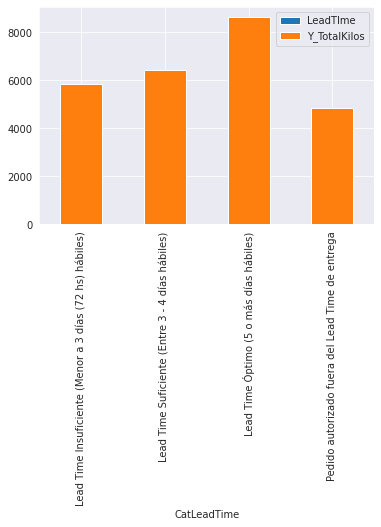

In [25]:
LeadTimeStats.plot.bar(stacked=True)

Aqui se puede observar que los pedidos con leadtime óptimo se llevan la mayor cantidad de kilos vendidos

# Analisis Multivariado

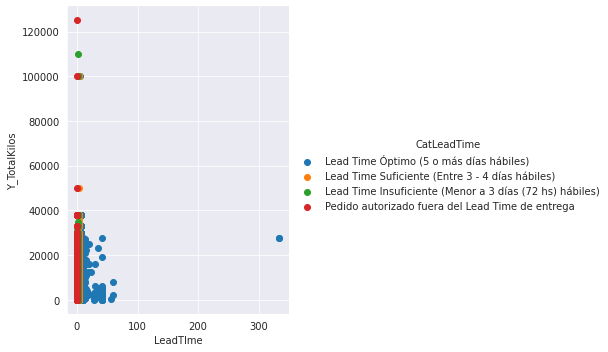

In [26]:
#FacetGrid - LeadTime vs Y_TotalKilos
sns.FacetGrid(Ventas,hue = 'CatLeadTime' , size = 5).map(plt.scatter,'LeadTIme','Y_TotalKilos').add_legend();
plt.show()

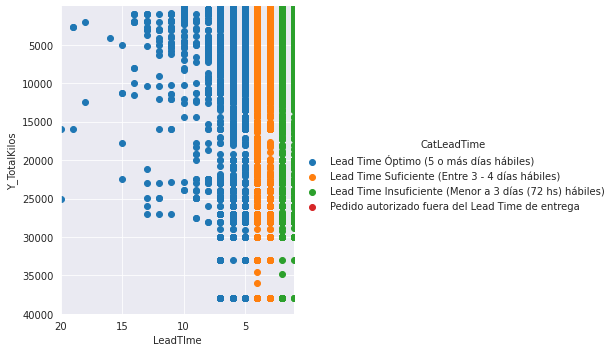

In [27]:
#Se colocan límites a la Grid
sns.FacetGrid(Ventas,hue = 'CatLeadTime' , size = 5, xlim=20, ylim=40000,).map(plt.scatter,'LeadTIme','Y_TotalKilos').add_legend();
plt.show()

Se puede observar cierta prolijidad en cuanto al ordenamiento de datos, la mayoría al parecer, se encuentra dentro del Lead Time Óptimo

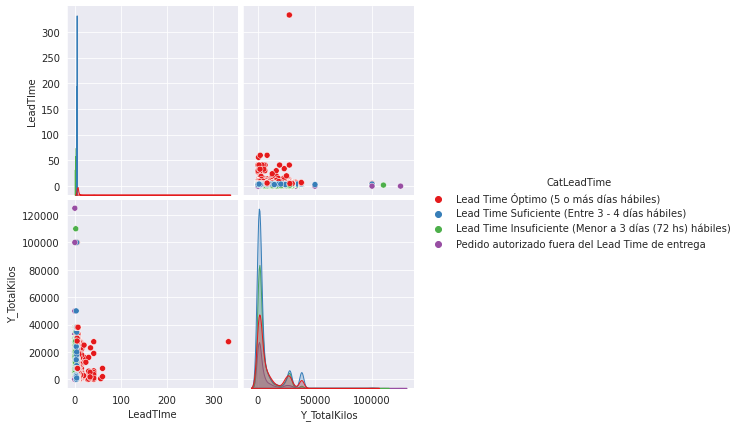

In [28]:
#Pairplot general con las categorías de LeadTime
sns.pairplot(Ventas,hue = 'CatLeadTime' , size = 3 , palette = 'Set1')

Dado que el dataset contiene mucha información, y la variable Artículo es categórica, estos gráficos relacionados a estas variables no tienen valor estadístico. SIn embargo se puede ver en las otras dos variables que se encuentran algunos outliers y se marca una tendencia en kilos.

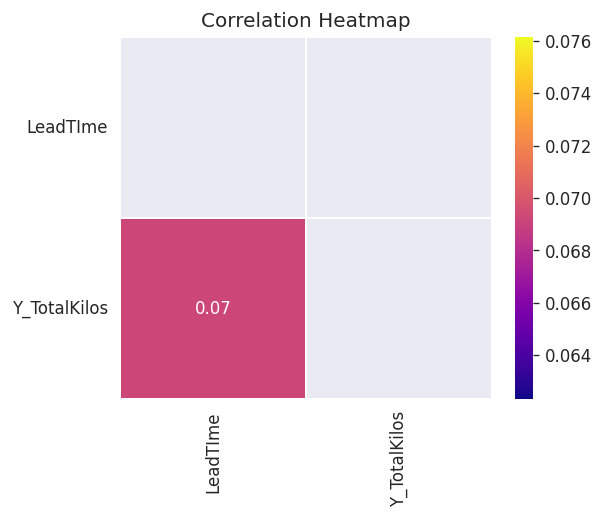

In [29]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(Ventas.corr(),dtype = bool))
sns.heatmap(Ventas.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

No se encuentran correlaciones entre las variables numéricas. Sin embargo, se decide avanzar con el siguiente gráfico.

Correlacion entre LeadTIme y Y_TotalKilos ==>  0.06923475168693735


<Figure size 500x400 with 0 Axes>

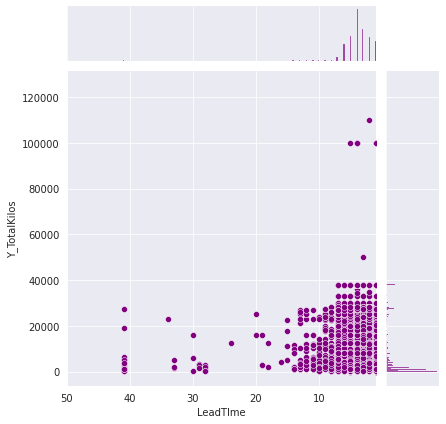

In [30]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
sns.jointplot(x='LeadTIme',y='Y_TotalKilos',data=Ventas,color = 'purple',xlim=50)
print(f"Correlacion entre LeadTIme y Y_TotalKilos ==> ",Ventas.corr().loc['Y_TotalKilos']['LeadTIme'])
plt.show()

Las relaciones entre las variables son muy bajas, esto es lógico ya que por definición en el dataset, ambas variables son independientes.

# Variables DateTIme

Dado de como se menciona al inicio del código, la idea de este dataset es realizar pronósticos de ventas, para incluir al análisis de variables se decide realizar un gráfico de tiempo respecto la variable objetivo y evaluar si hay tendencias sesionales.

In [31]:
#Se crea un nuevo dataframe contenido como índice las fechas, y de datos la columna Y_TotalKilos
Pronostico=Ventas[['FechaDePedido','Y_TotalKilos']]
Pronostico.set_index('FechaDePedido', inplace = True)
print(Pronostico)

               Y_TotalKilos
FechaDePedido              
2021-01-06             9360
2021-01-06            11232
2021-01-06            11232
2021-01-06             4500
2021-01-06             4500
...                     ...
2021-11-19             8000
2021-11-19             8000
2021-11-19             8000
2021-11-19            28000
2021-11-19            28000

[22675 rows x 1 columns]


In [32]:
#Para mayor claridad, se agrupan las ventas por día
PronosticoDia=Pronostico.resample('D', convention='start').sum()
PronosticoDiaProm=Pronostico.resample('D', convention='start').mean()
PronosticoDia

Y_TotalKilos
FechaDePedido              
2021-01-02           551000
2021-01-03                0
2021-01-04           158300
2021-01-05           190173
2021-01-06           381127
...                     ...
2021-11-15           142850
2021-11-16           200752
2021-11-17           139214
2021-11-18           626768
2021-11-19            97000

[322 rows x 1 columns]

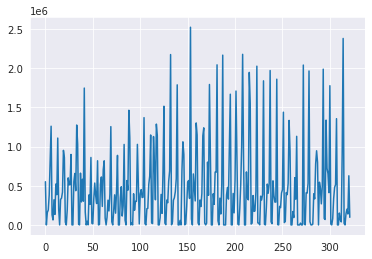

In [33]:
#Grafico de ventas vs tiempo
values=PronosticoDia.values
plt.plot(values)
plt.show()

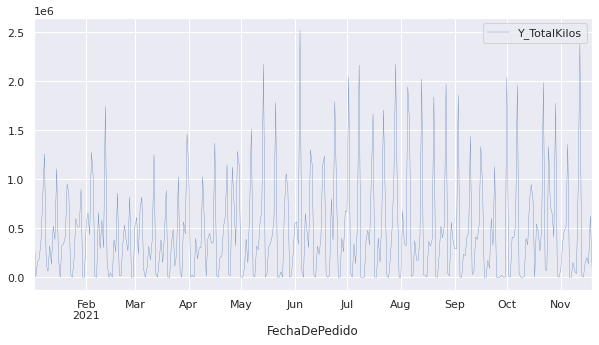

In [34]:
#Ventas vs tiempo en un gráfico de líneas
sns.set(rc={'figure.figsize':(10, 5)})
PronosticoDia.plot(linewidth=0.3)

No se encuentran patrones de estacionalidad, sin embargo se decide analizar un poco mas a fondo seleccionando meses

Text(0, 0.5, 'Ventas por kilo')

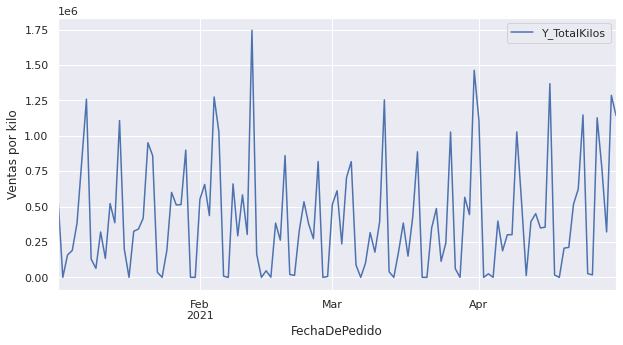

In [35]:
#Grafico del primer cuatrimestre del año
eje = PronosticoDia.loc['2021-01':'2021-04'].plot()
eje.set_ylabel('Ventas por kilo')

Se puede apreciar que dentro de los días, en una semana, hay una tendencia positiva para algunos y negativa para otros. Tambien acercándose a mayo, se torna en crecimiento las ventas

Text(0, 0.5, 'Ventas por kilo')

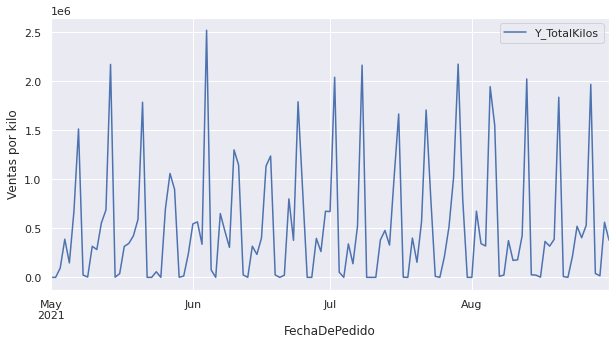

In [36]:
#Grafico del segundo cuatrimestre del año
eje = PronosticoDia.loc['2021-05':'2021-08'].plot()
eje.set_ylabel('Ventas por kilo')

En este gráfico se mantiene la tendencia general de cambios en días de semana

Text(0, 0.5, 'Ventas por kilo')

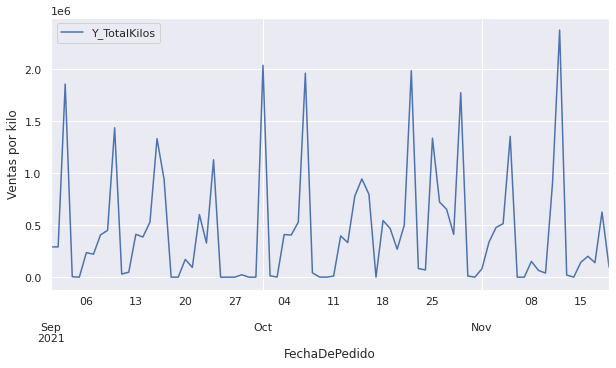

In [37]:
#Grafico del tercer cuatrimestre del año
eje = PronosticoDia.loc['2021-09':'2021-12'].plot()
eje.set_ylabel('Ventas por kilo')

En este gráfico se puede observar una baja en las ventas por la disminución de densidad.

In [38]:
#Para mayor claridad, se agrupan las ventas por mes
PronosticoMes=Pronostico.resample('M', convention='start').sum()
PronosticoMes

Y_TotalKilos
FechaDePedido              
2021-01-31         11866295
2021-02-28         11629956
2021-03-31         12034153
2021-04-30         14228450
2021-05-31         13334422
2021-06-30         16513713
2021-07-31         18199414
2021-08-31         15654613
2021-09-30         11226708
2021-10-31         17499238
2021-11-30          7540330

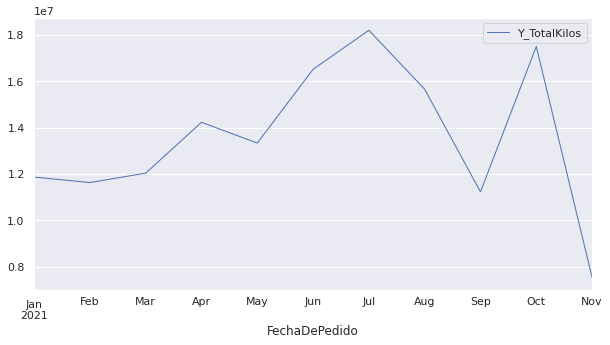

In [39]:
#Ventas vs tiempo en un gráfico de líneas
sns.set(rc={'figure.figsize':(10, 5)})
PronosticoMes.plot(linewidth=1)

Se puede ver una tendencia clara de aumento de ventas en invierno, que coincide con el tipo de mercado de la empresa ya que los insumo que produce son para panificados. Luego tiene un pico en octubre, donde aparece la famosa temporada de ''navidad'' y arranca la preventa para producción de pandulces, turrones y esos insumos para diciembre. Este gráfico sería ideal complementarlo con el de otros años para ver si las tendencias se mantienen

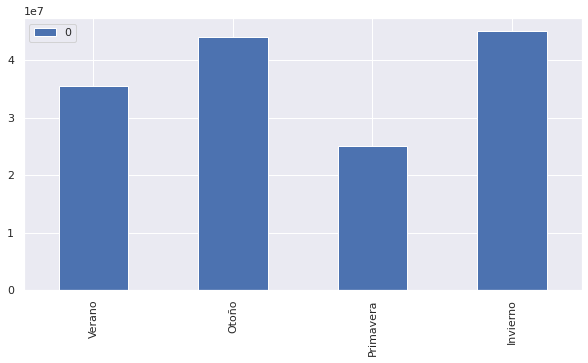

In [40]:
#Graficando tendencias estacionales
Otoño = PronosticoMes.Y_TotalKilos[3] + PronosticoMes.Y_TotalKilos[4] + PronosticoMes.Y_TotalKilos[5]
Invierno = PronosticoMes.Y_TotalKilos[6] + PronosticoMes.Y_TotalKilos[7] + PronosticoMes.Y_TotalKilos[8]
Primavera = PronosticoMes.Y_TotalKilos[9] + PronosticoMes.Y_TotalKilos[10]
Verano = PronosticoMes.Y_TotalKilos[0] + PronosticoMes.Y_TotalKilos[1] + PronosticoMes.Y_TotalKilos[2]
Estaciones =np.array([Verano ,Otoño, Primavera,Invierno])
Estaciones = pd.DataFrame(Estaciones, index=['Verano' ,'Otoño', 'Primavera','Invierno'])
Estaciones.plot.bar(stacked=True)

In [41]:
#Para el análisis, se agrupan las ventas por semana
PronosticoSemana=Pronostico.resample('W', convention='start').mean()
PronosticoSemana

Y_TotalKilos
FechaDePedido              
2021-01-03     26238.095238
2021-01-10      6046.616935
2021-01-17      4801.638489
2021-01-24      6514.517778
2021-01-31      4990.678309
2021-02-07      7341.630798
2021-02-14      5554.794074
2021-02-21      5816.399267
2021-02-28      4624.661386
2021-03-07      5889.774257
2021-03-14      5873.603093
2021-03-21      5969.170588
2021-03-28      5146.320542
2021-04-04      4385.529197
2021-04-11      5403.417969
2021-04-18      5924.454545
2021-04-25      5950.376623
2021-05-02      8701.941948
2021-05-09      6667.093677
2021-05-16      8065.069583
2021-05-23      7479.809935
2021-05-30      7867.063401
2021-06-06      7649.314286
2021-06-13      7375.984877
2021-06-20      7025.000000
2021-06-27      7760.622000
2021-07-04      5632.162088
2021-07-11      8169.930412
2021-07-18      7290.578947
2021-07-25      6978.760000
2021-08-01      8356.840708
2021-08-08      5650.916473
2021-08-15      6853.295117
2021-08-22      8566.410557
2021-08-29      7450.332661
2021-09-05      6458.717557
2021-09-12      6034.511727
2021-09-19      6967.655706
2021-09-26      5551.565632
2021-10-03     21845.684211
2021-10-10      5901.035211
2021-10-17      6336.574757
2021-10-24      6691.348123
2021-10-31      7882.060995
2021-11-07      5899.855011
2021-11-14      9098.760204
2021-11-21      5386.535714

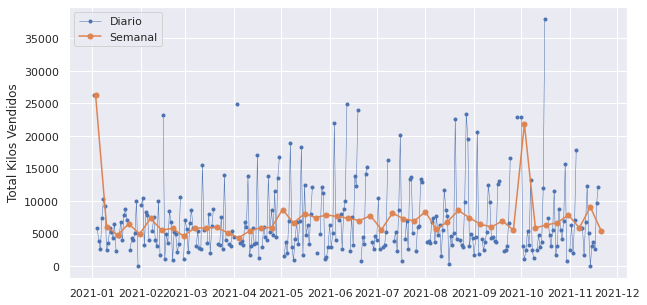

In [42]:
#Promedios Semanales y Diarios
inicio, final = '2021-01','2021-11'
fig,eje = plt.subplots()
eje.plot(PronosticoDiaProm.loc[inicio:final,'Y_TotalKilos'],marker='.',linestyle='-',linewidth=0.5,label='Diario')
eje.plot(PronosticoSemana.loc[inicio:final,'Y_TotalKilos'],marker='o',markersize=5,label='Semanal')
eje.set_ylabel('Total Kilos Vendidos')
eje.legend()

Text(0, 0.5, 'Ventas por kilo')

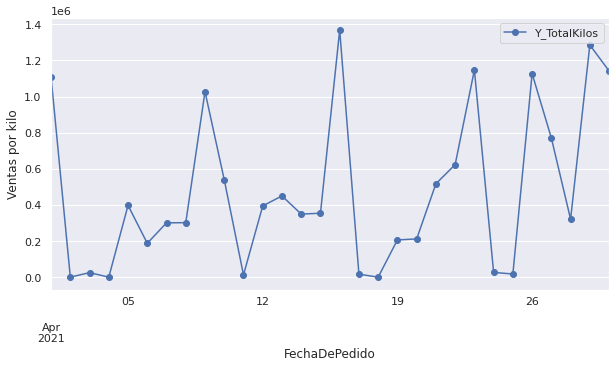

In [43]:
#Se analiza el mes de abril para detectar tendencias diarias
eje = PronosticoDia.loc['2021-04'].plot(marker='o',linestyle='-')
eje.set_ylabel('Ventas por kilo')

Se detectan picos en los días viernes, y caídas en los días domingos y sábados. Se encuentra una tendencia en días laborables. Por ejemplo, el 2 de abril fue feriado y tiene baja tendencia casi 0

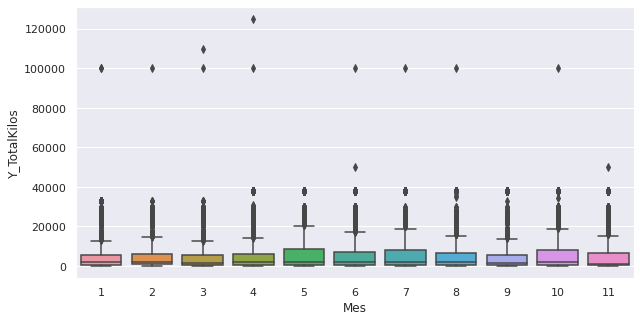

In [44]:
#Verificamos estacionalidad con un boxplot mes a mes
PronosticoNombreMes=Pronostico
PronosticoNombreMes['Mes'] = PronosticoNombreMes.index.month
sns.boxplot(data=Pronostico, x='Mes', y='Y_TotalKilos')

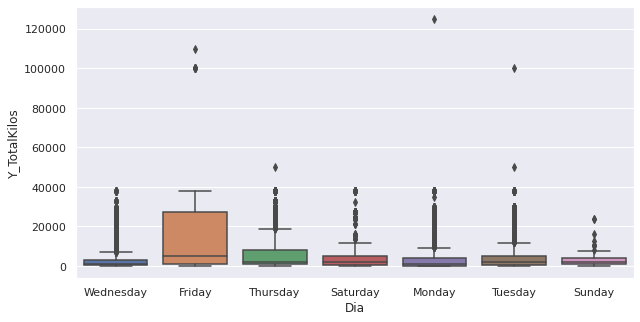

In [45]:
#Verificamos estacionalidad semanal con un boxplot
PronosticoNombreDia=Pronostico
PronosticoNombreDia['Dia'] = PronosticoNombreDia.index.day_name()
sns.boxplot(data=Pronostico, x='Dia', y='Y_TotalKilos')

Se puede apreciar los días viernes un aumento en la cantidad total de kilos, sin embargo la mediana se mantiene. Esto se da porque los días viernes se cargan los pedidos grandes para el resto de la semana, como los graneles

In [46]:
#Se actualiza paquete
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


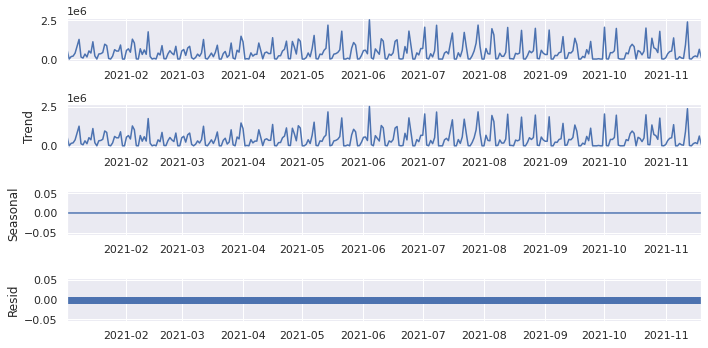

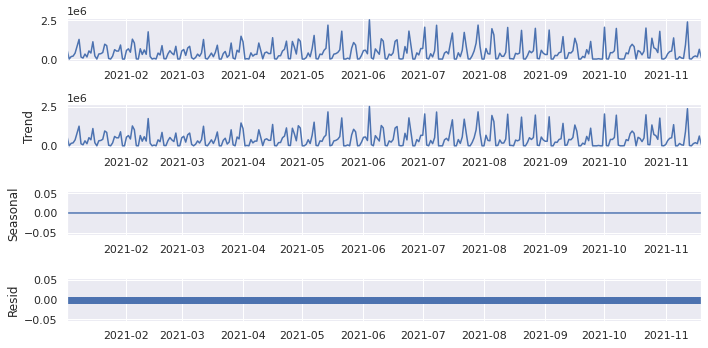

In [47]:
#Descomposicion sesional
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(PronosticoDia, model='additive', period=1)
result.plot()


Con estos resultados no se aprecia una tendencia sesional

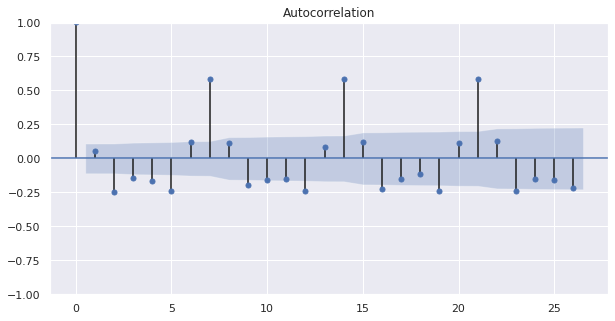

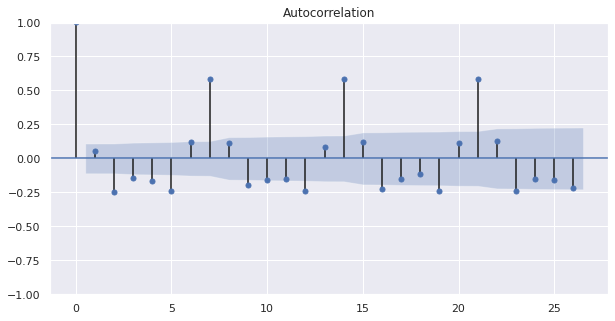

In [48]:
#Autocorrelacion
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(PronosticoDia)

Se puede ver que la correlacion con los datos va bajando a medida que avanza los períodos de la serie de tiempo

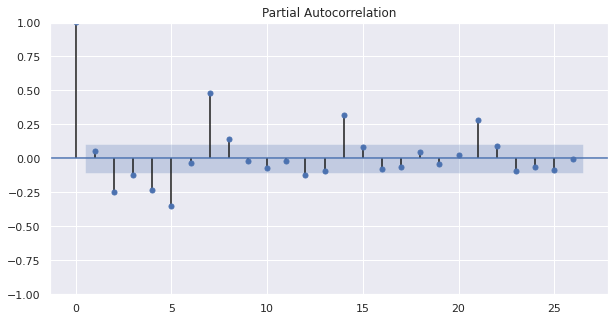

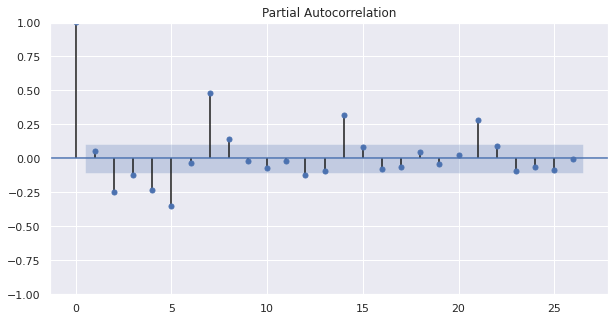

In [49]:
#Correlación Parcial
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(PronosticoDia)

Es este diagrama se puede ver que las relaciones son mas altas en los valores de períodos cercanos a 1, despues las correlaciones bajan y se vuelven nulas.

In [50]:
#Estacionalidad con Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(PronosticoDia.Y_TotalKilos.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -3.235202009993093
ADF p-values: 0.018035355835975625
ADF number of lags used: 14
ADF number of observations: 307
ADF critical values: {'1%': -3.4518314994261337, '5%': -2.8710009653519166, '10%': -2.571810878948318}
ADF best information criterion: 8721.597790823776


Al ser el valor de P mayor a 0.05, se acepta la hipótesis de que el dataset es no estacionario, y se rechaza la hipótesis de que tiene estacionalidad. Esto implica que no es necesario eliminar tendencias del dataset y coincide con los datos graficados

# Detección de outliers

Dado que de los analisis anteriores, se puede ver presencia de outliers en los extremos de las variables, se decide avanzar con este análisis. Dado que suponemos que nuestro target ventas depende de todo el resto de variables, vamos a trabajar con la variable LeadTime primero

In [51]:
#Valores unicos de la variable ''LeadTIme''
Ventas.LeadTIme.unique()

array([  8,   3,   0,   1,   2, 333,  28,   5,   4,  13,  10,   6,   7,
        12,  11,   9,  19,  20,  56,  14,  34,  15,  60,  41,  18,  29,
        16,  30,  24,  33])

In [52]:
#Valores unicos de la variable ''LeadTIme'' y su cuenta
LeadTIme_uniques,counts = np.unique(Ventas.LeadTIme, return_counts=True)
print(LeadTIme_uniques)
print(counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  24  28  29  30  33  34  41  56  60 333]
[3751 2105 2565 3397 5607 2641 1847  406  103   38   59   38   19   18
   11    5    1    2    3    2    1    7    3    3    3    1   34    1
    2    2]


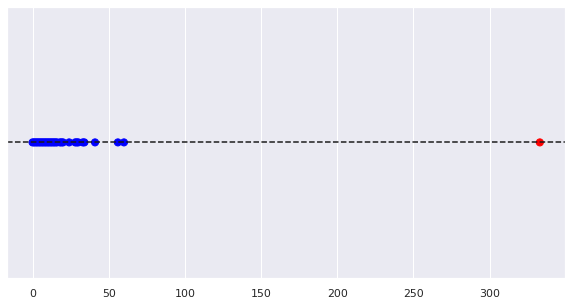

In [53]:
#Graficamos los valores
sizes = 50
colors = ['blue']*len(LeadTIme_uniques)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(LeadTIme_uniques, np.ones(len(LeadTIme_uniques)), s=sizes, color=colors)
plt.yticks([])
plt.show()

In [54]:
#Tomando en cuenta la eliminación de datos en base a la media mas dos desviaciones estandar
media = (Ventas.LeadTIme).mean()
std = (Ventas.LeadTIme).std()*2
print(f'Los puntos de la columna LeadTime que son outliers, son aquellos que superan el valor de',media+std*2)

Los puntos de la columna LeadTime que son outliers, son aquellos que superan el valor de 19.767603701822647


In [55]:
Ventas_mask=Ventas['LeadTIme']>=20
filtered_df = Ventas[Ventas_mask]
print(f'La cantidad de valores outliers dentro de la columna Lead TIme es de',filtered_df.LeadTIme.count())

La cantidad de valores outliers dentro de la columna Lead TIme es de 59


In [56]:
#Porcentaje de datos a eliminar respecto del total
a=len(filtered_df.LeadTIme)/len(Ventas.LeadTIme)
b=0.10
if a<b:
  print('Eliminar valores, ya que no afectan significativamente a los datos')
else:
   print('No eliminar valores, buscar alternativas como reemplazo por promedio o mediana')

Eliminar valores, ya que no afectan significativamente a los datos


In [57]:
#Eliminación de outliers utilizando el método zscore con stats
from scipy import stats
new=Ventas[(np.abs(stats.zscore(Ventas[['LeadTIme','Y_TotalKilos']])) < 3).all(axis=1)]
VentasClean=new
print(f'La cantidad de filas eliminada es de',len(Ventas[['LeadTIme','Y_TotalKilos']])-len(new),'con un porcentaje total de', 100*(1-len(new)/len(Ventas[['LeadTIme','Y_TotalKilos']])),'%')

La cantidad de filas eliminada es de 78 con un porcentaje total de 0.34399117971334325 %


In [58]:
#Control de NaNs
VentasClean.isna().sum()

Numero             0
Articulo           0
FechaDePedido      0
FechaDeEntrega     0
Cuenta             0
Localidad         17
Provincia          0
LeadTIme           0
CatLeadTime        0
Y_TotalKilos       0
dtype: int64

In [59]:
#Eliminación de NaNs
VentasClean = VentasClean.dropna()
VentasClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22580 entries, 0 to 22674
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Numero          22580 non-null  object        
 1   Articulo        22580 non-null  object        
 2   FechaDePedido   22580 non-null  datetime64[ns]
 3   FechaDeEntrega  22580 non-null  datetime64[ns]
 4   Cuenta          22580 non-null  object        
 5   Localidad       22580 non-null  object        
 6   Provincia       22580 non-null  object        
 7   LeadTIme        22580 non-null  int64         
 8   CatLeadTime     22580 non-null  object        
 9   Y_TotalKilos    22580 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 1.9+ MB


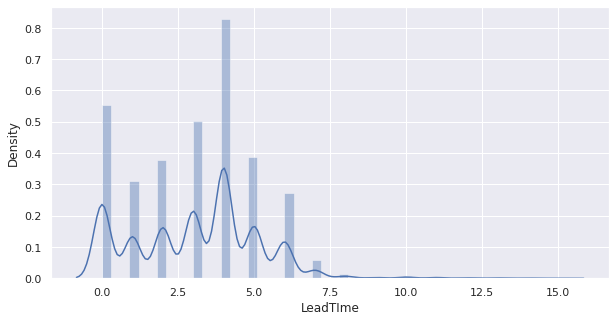

In [60]:
#Distribución de LeadTime
distplot(VentasClean.LeadTIme)

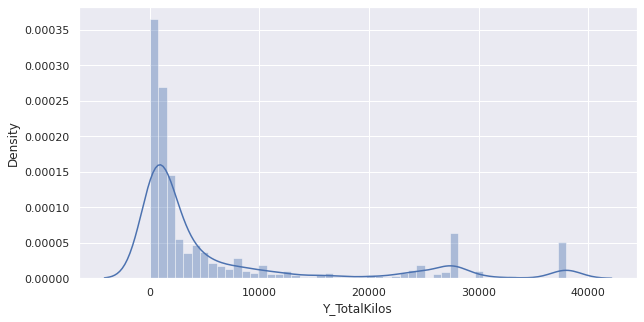

In [61]:
#Distribución de Y_TotalKilos
distplot(VentasClean.Y_TotalKilos)

In [62]:
#Resampleando con los valores limpios sin outliers
PronosticoClean=VentasClean[['FechaDePedido','Y_TotalKilos']]
PronosticoClean.set_index('FechaDePedido', inplace = True)
PronosticoDiaClean=PronosticoClean.resample('D', convention='start').sum()
PronosticoDiaClean

Y_TotalKilos
FechaDePedido              
2021-01-02           496000
2021-01-03                0
2021-01-04           158300
2021-01-05           190173
2021-01-06           369387
...                     ...
2021-11-15           142850
2021-11-16           200752
2021-11-17           139214
2021-11-18           626768
2021-11-19            97000

[322 rows x 1 columns]

# Forecasting

In [122]:
#Importando error MAPE
from sklearn.metrics import mean_absolute_percentage_error

Este error es el elegido para evaluar los modelos implementados, por ser porcentual y estar independizado de la unidad de medida.

In [64]:
#Forecasting con XGBoost

In [65]:
#Se instala el modelo
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
#Se importan librerias a utilizar
from numpy import asarray
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

In [126]:
# Se importa el modelo
import xgboost
# define model
model = XGBRegressor()

In [127]:
# Transformación del dataset de series de tiempo en uno de aprendizaje supervisado
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [128]:
# Validación para los datos del dataset actual
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_percentage_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

In [129]:
# Separando en train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [130]:
# Se Realiza el fit en el modelo elegido
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

>expected=38792.0, predicted=271094.0
>expected=887176.0, predicted=725583.3
>expected=2378766.0, predicted=1362603.4
>expected=20220.0, predicted=-84643.9
>expected=110.0, predicted=41035.7
>expected=142850.0, predicted=359883.3
>expected=200752.0, predicted=371267.5
>expected=139214.0, predicted=412490.9
>expected=626768.0, predicted=847918.1
>expected=97000.0, predicted=1318682.0
MAPE: 40.111


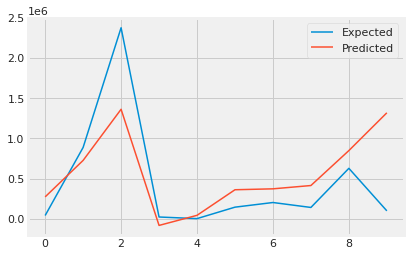

In [131]:
#Finalizando el modelo y graficando, se agrega el error MAPE
values = PronosticoDiaClean.values
data = series_to_supervised(values, n_in=15)
# evaluate
mape, y, yhat = walk_forward_validation(data, 10)
print('MAPE: %.3f' % mape)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [73]:
ErrorXGBoost=mean_absolute_percentage_error(y, yhat)
print(ErrorXGBoost)

40.111497850459756


Utilizando los datos de los últimos 15 dias y para predecir 10 periodos se obtiene un MAPE alto, pero razonable. Viendo el gráfico se aprecia que se adapta a las tendencias.

In [74]:
#Forecasting con ARIMA

In [75]:
#Se instala el paquete Arima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [76]:
#Se  borra statmodels para ajustar en el modelo de ARIMA
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
!pip3 install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [78]:
#Se importa el modelo
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [79]:
#Definición del modelo
ARIMA_model = pm.auto_arima(PronosticoDiaClean['Y_TotalKilos'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  322
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -4688.156
Date:                Wed, 01 Jun 2022   AIC                           9388.311
Time:                        19:44:50   BIC                           9410.959
Sample:                             0   HQIC                          9397.353
                                - 322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.101e+05   1.75e+05      3.479      0.001    2.66e+05    9.54e+05
ar.L1          0.1745      0.258      0.678      0.498      -0.330       0.679
ar.L2         -0.2726      0.110     -2.482      0.0

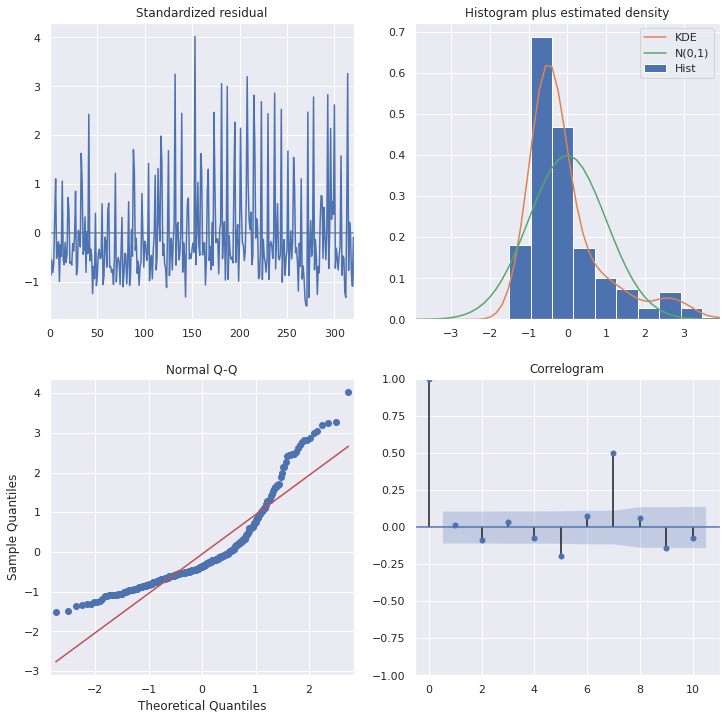

In [80]:
#Graficando resultados de autoarima
ARIMA_model.plot_diagnostics(figsize=(12,12))
plt.show()

In [81]:
#Se define el dataset a utilizar
df=PronosticoDiaClean

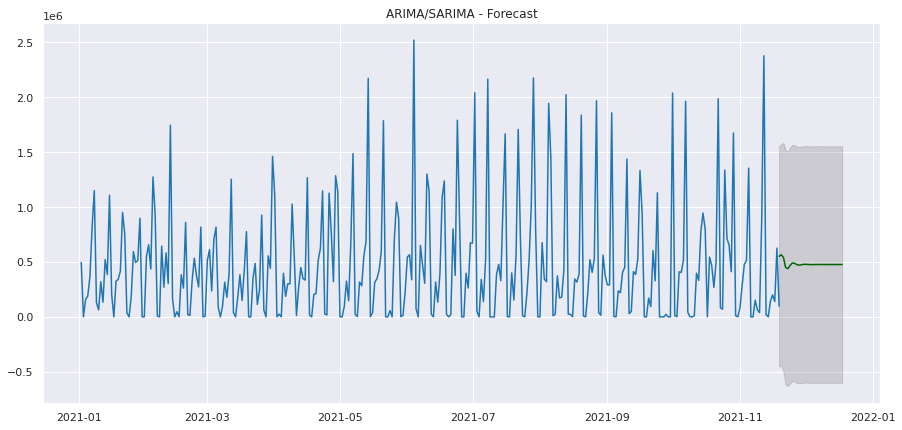

In [82]:
#Se realiza el fit del moelo para 30 días y se grafica
def forecast(ARIMA_model, periods=30):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1], periods = n_periods)

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df["Y_TotalKilos"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast")
    plt.show()

forecast(ARIMA_model)

In [83]:
#Se prueba con SARIMA para ver un modelo sesional
SARIMA_model = pm.auto_arima(df["Y_TotalKilos"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
print(SARIMA_model.summary())

                                 SARIMAX Results                                 
Dep. Variable:                         y   No. Observations:                  322
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood               -4485.823
Date:                   Wed, 01 Jun 2022   AIC                           8975.647
Time:                           19:45:27   BIC                           8983.152
Sample:                                0   HQIC                          8978.645
                                   - 322                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.8811      0.018    -48.881      0.000      -0.916      -0.846
sigma2       1.54e+11   1.93e-15      8e+25      0.000    1.54e+11    1.54e+11
Ljung-Box (L1) (Q):         

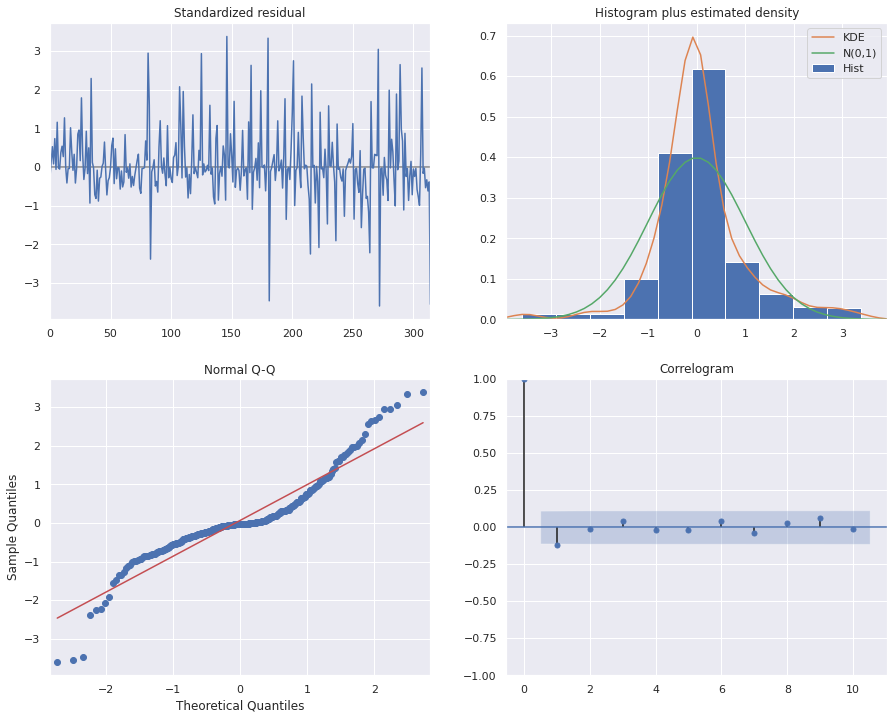

In [84]:
#Se grafican los resultados
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

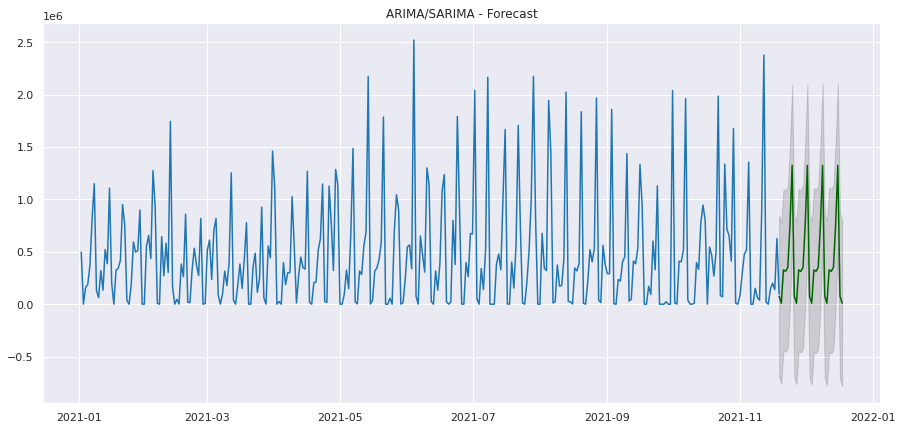

In [85]:
#Gráfico de la predicción
forecast(SARIMA_model)

predicted=510667.076496, expected=675898.000000
predicted=754271.875767, expected=344140.000000
predicted=1100079.436479, expected=320002.000000
predicted=560411.817102, expected=1945700.000000
predicted=860202.142866, expected=1451190.000000
predicted=533771.139040, expected=11120.000000
predicted=524140.398958, expected=23040.000000
predicted=550083.644817, expected=374710.000000
predicted=359406.170990, expected=173068.000000
predicted=890807.480590, expected=178760.000000
predicted=780361.658813, expected=427364.000000
predicted=234669.501228, expected=2024940.000000
predicted=861422.127861, expected=26020.000000
predicted=138718.429080, expected=23040.000000
predicted=409258.421234, expected=1720.000000
predicted=304414.125810, expected=344625.000000
predicted=222624.935369, expected=318212.000000
predicted=1033251.542533, expected=388142.000000
predicted=197412.815198, expected=1838127.000000
predicted=830195.678361, expected=8320.000000
predicted=-8386.786344, expected=0.000000


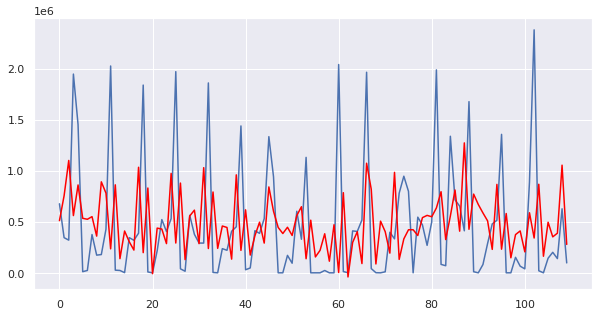

In [86]:
#Se evalua el modelo utilizando los datos originales del Dataset
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
# load dataset
series = PronosticoDiaClean
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mape = sqrt(mean_absolute_percentage_error(test, predictions))
print('Test MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Como resultado, el valor de MAPE para este modelo resulta mucho mas alto que el anterior. Por lo que se lo descarta para el análisis. EL valor alto de MAPE se debe a que en algunos puntos se debería haber predecido 0 y se predijo un valor alto. A continuación se presenta la misma forma de cálculo que el modelo anteiror

In [87]:
ErrorSARIMA=mean_absolute_percentage_error(test, predictions)
print(ErrorSARIMA)

1.9963383723893362e+20


In [88]:
#Forecasting con Prophet

In [89]:
#Instalamos el paquete de Prophet
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
#Se importan las librerias utilizadas
from pandas import to_datetime
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

In [91]:
#Preparamos el dataset segun lo requiere el algoritmo
df=PronosticoDiaClean[['Y_TotalKilos']]
df.columns=['y']
df=df.reset_index( drop=True)
df['ds']=to_datetime(PronosticoDiaClean.index)
df

y         ds
0    496000 2021-01-02
1         0 2021-01-03
2    158300 2021-01-04
3    190173 2021-01-05
4    369387 2021-01-06
..      ...        ...
317  142850 2021-11-15
318  200752 2021-11-16
319  139214 2021-11-17
320  626768 2021-11-18
321   97000 2021-11-19

[322 rows x 2 columns]

In [92]:
#Se realiza el fit
m = Prophet(yearly_seasonality=False, daily_seasonality= False, weekly_seasonality= True).fit(df)

In [93]:
#Se asignan la cantidad de períodos a predecir
future=m.make_future_dataframe(periods=19) 
future.tail() 

ds
336 2021-12-04
337 2021-12-05
338 2021-12-06
339 2021-12-07
340 2021-12-08

In [94]:
#Se determinan los valores de predicción en esta tabla, en conjunto con sus desviaciones.
forecast=m.predict(future) 
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
336 2021-12-04  103094.082828 -352483.681627  555288.067128
337 2021-12-05   43084.378945 -438204.373357  492970.040705
338 2021-12-06  368711.594755 -114056.923238  808649.750401
339 2021-12-07  384610.101014  -40076.667017  820666.768001
340 2021-12-08  454265.199714    -949.573297  882451.496026

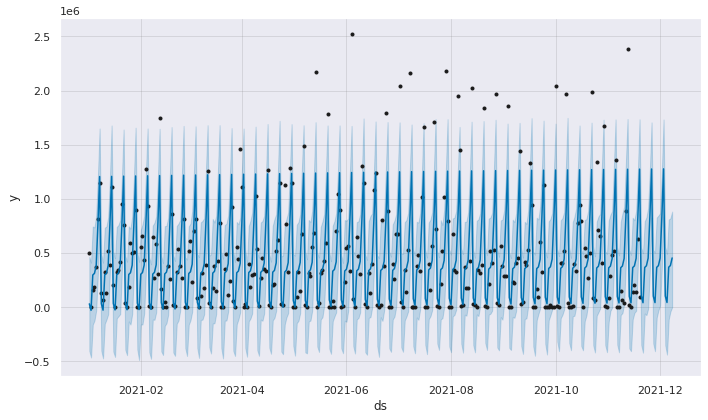

In [95]:
#Se grafica la predicción
fig1=m.plot(forecast)

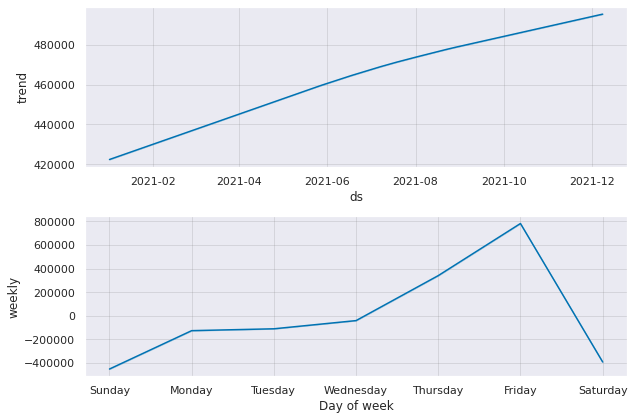

In [96]:
#Se grafican las tendencias y sesionalidad
plot2=m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat     yhat_lower    yhat_upper
0 2021-11-01  3.629534e+05  -89402.437550  7.867359e+05
1 2021-11-02  3.788519e+05  -67409.785022  8.202745e+05
2 2021-11-03  4.485070e+05    8539.976986  9.045327e+05
3 2021-11-04  8.302278e+05  397860.438933  1.257891e+06
4 2021-11-05  1.272152e+06  813489.288749  1.731504e+06
MAPE: 32465104798954291200.000


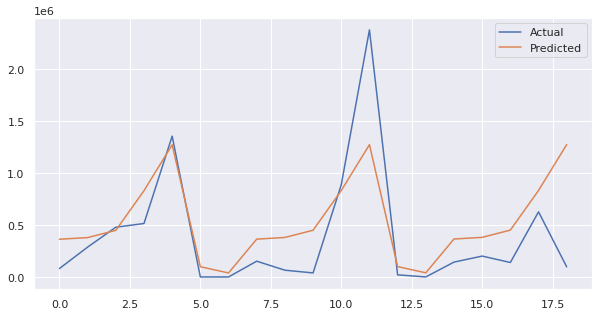

In [97]:
#Se realiza el fit con los datos originales del dataset para evaluar el modelo
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
df=PronosticoDiaClean[['Y_TotalKilos']]
df.columns=['y']
df=df.reset_index( drop=True)
df['ds']=to_datetime(PronosticoDiaClean.index)
# create test dataset, remove last 19 days
train = df.drop(df.index[-19:])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 20):
	date = '2021-11-%d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# calculate MAE between expected and predicted values for december
y_true = df['y'][-19:].values
y_pred = forecast['yhat'].values
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

El error MAPE da valores muy altos. Sin embargo, partes del gráfico se puede apreciar como sigue las tendencias. Se sigue avanzando con otros modelos

In [98]:
#Forecasting con NeuralProphet

In [99]:
#Se instala el paquete de NeuralProphet
! pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 673 kB/s 
     |████████████████████████████████| 172 kB 11.2 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [100]:
#Se realiza el fit del modelo
from neuralprophet import NeuralProphet
m = NeuralProphet(weekly_seasonality= True)
metrics = m.fit(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.689% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.689% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override thi

  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.48E-01, min: 5.13E-01
INFO:NP.utils_torch:lr-range-test results: steep: 2.48E-01, min: 5.13E-01


  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.57E-01, min: 5.13E-01
INFO:NP.utils_torch:lr-range-test results: steep: 3.57E-01, min: 5.13E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.07E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 2.07E-01
Epoch[293/293]: 100%|██████████| 293/293 [00:28<00:00, 10.38it/s, SmoothL1Loss=0.0196, MAE=2.3e+5, RMSE=3.28e+5, RegLoss=0]


In [101]:
#Se plantea la matriz futuro
future = m.make_future_dataframe(df=df, periods=19)
forecast2 = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.689% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.689% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.737% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.737% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.737% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.737% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


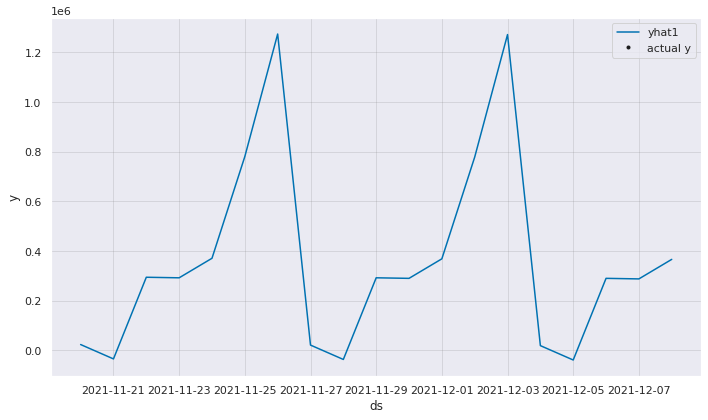

In [102]:
#Se grafican los resultados
fig_forecast = m.plot(forecast2)

Este modelo no encaja con los resultados del dataset, por lo que se descarta.

In [103]:
#Forecasting Autoregresivo Recursivo con RandomForestRegressor

In [104]:
#Se instala el skforecast
! pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.3 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 9.8 MB 54.6 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [105]:
#Se realizan las importaciones y configuraciones
# Gráficos
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modelado y Forecasting

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Configuración warnings
import warnings
# warnings.filterwarnings('ignore')

In [106]:
#Se renombra la columna del dataset
datos = PronosticoDiaClean.rename(columns={'Y_TotalKilos': 'y'})
datos = datos.sort_index()
datos.head()

y
FechaDePedido        
2021-01-02     496000
2021-01-03          0
2021-01-04     158300
2021-01-05     190173
2021-01-06     369387

In [107]:
# Se Verifica que un índice temporal está completo
(datos.index == pd.date_range(
                    start = datos.index.min(),
                    end   = datos.index.max(),
                    freq  = datos.index.freq)
).all()

True

Fechas train : 2021-01-02 00:00:00 --- 2021-08-21 00:00:00  (n=232)
Fechas test  : 2021-08-22 00:00:00 --- 2021-11-19 00:00:00  (n=90)


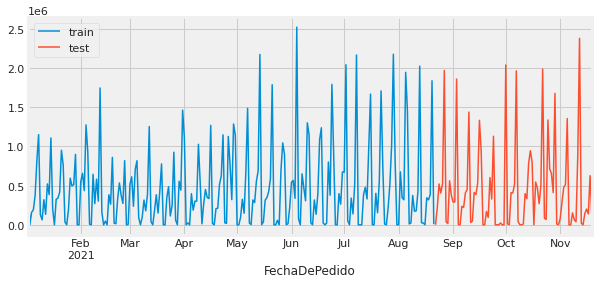

In [108]:
#Separación del train y test. Se utilizan los últimos 90 días para evaluar

steps = 90
datos_train = datos[:-steps]
datos_test  = datos[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
ax.legend();

In [109]:
# Crear y entrenar forecaster. Se utiliza como predicción los últimos 15 días
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),
                lags = 15)

forecaster.fit(y=datos_train['y'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2021-01-02 00:00:00'), Timestamp('2021-08-21 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-01 19:47:13 
Last fit date: 2022-06-01 19:47:13 
Skforecast version: 0.4.3 

In [110]:
# Predicciones a cuantos ciclos a futuro
steps = 90
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

2021-08-22      5431.06
2021-08-23    244275.25
2021-08-24    299179.84
2021-08-25    382228.05
2021-08-26    666951.63
Freq: D, Name: pred, dtype: float64

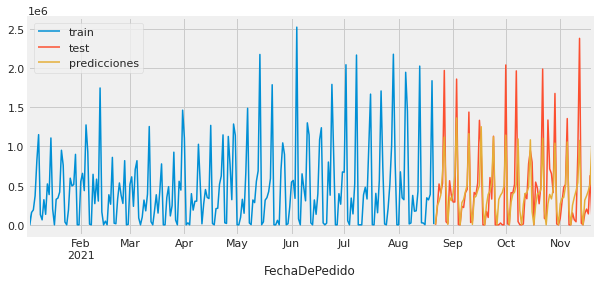

In [111]:
#Gráfico de resultados
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [112]:
#Error del test
error_mape = mean_absolute_percentage_error(
                y_true = datos_test['y'],
                y_pred = predicciones
            
            )

print(f"Error de test (mape): {error_mape}")

Error de test (mape): 9.352594571562854e+19


In [113]:
# Grid search de hiperparámetros
steps = 90
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 20 # Este valor será remplazado en el grid search
             )

# Lags utilizados como predictores
lags_grid = [10, 30]

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_absolute_percentage_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                   )

Number of models compared: 12


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:21<00:00, 40.85s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 2.1067469688927656e+20



In [114]:
# Resultados Grid Search
resultados_grid

lags  \
3                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
2                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
1                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
0                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
4                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
5                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
10  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
8   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
6   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
7   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
11  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
9   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                    params        metric  max_depth  \
3    {'max_depth': 5, 'n_estimators': 500}  2.106747e+20          5   
2    {'max_depth': 5, 'n_estimators': 100}  2.149523e+20          5   
1    {'max_depth': 3, 'n_estimators': 500}  2.201907e+20          3   
0    {'max_depth': 3, 'n_estimators': 100}  2.222476e+20          3   
4   {'max_depth': 10, 'n_estimators': 100}  2.307468e+20         10   
5   {'max_depth': 10, 'n_estimators': 500}  2.321958e+20         10   
10  {'max_depth': 10, 'n_estimators': 100}  2.326772e+20         10   
8    {'max_depth': 5, 'n_estimators': 100}  2.504377e+20          5   
6    {'max_depth': 3, 'n_estimators': 100}  2.587538e+20          3   
7    {'max_depth': 3, 'n_estimators': 500}  2.664075e+20          3   
11  {'max_depth': 10, 'n_estimators': 500}  2.774637e+20         10   
9    {'max_depth': 5, 'n_estimators': 500}  2.876930e+20          5   

    n_estimators  
3            500  
2            100  
1            500  
0            100  
4            100  
5            500  
10           100  
8            100  
6            100  
7            500  
11           500  
9            500

La mejor combinación es de 10 lags, y en RandomForest 5 max depth y 500 n

In [115]:
# Crear y entrenar forecaster con mejores hiperparámetros
regressor = RandomForestRegressor(max_depth=5, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=datos_train['y'])

In [116]:
# Predicciones

predicciones = forecaster.predict(steps=steps)

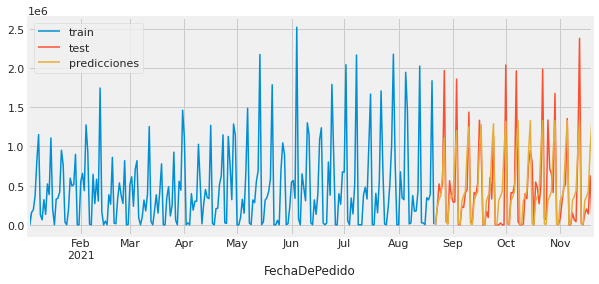

In [117]:
# Gráfico
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [118]:
#Error del test
error_mape = mean_absolute_percentage_error(
                y_true = datos_test['y'],
                y_pred = predicciones
            
            )

print(f"Error de test (mape): {error_mape}")

Error de test (mape): 8.847443779530259e+19


Si bien con los hiperparámetros se logro mejorar el error, el error MAPE sigue siendo muy grande para este modelo.

# Out-of-sample Forecast

De todos los modelos entrenados, el que mejor se ajusta al dataset segun el error MAPE, es el XGBoost. Se avanza con este modelo en aplicar predicciones a futuro.

>expected=38792.0, predicted=271094.0
>expected=887176.0, predicted=725583.3
>expected=2378766.0, predicted=1362603.4
>expected=20220.0, predicted=-84643.9
>expected=110.0, predicted=41035.7
>expected=142850.0, predicted=359883.3
>expected=200752.0, predicted=371267.5
>expected=139214.0, predicted=412490.9
>expected=626768.0, predicted=847918.1
>expected=97000.0, predicted=1318682.0
MAPE: 40.111


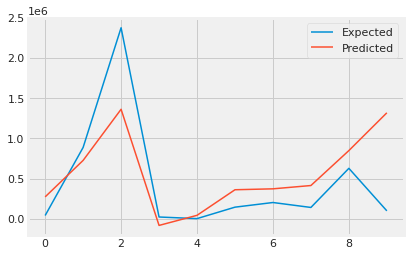

In [132]:
#Se vuelve a traer las predicciones del test/train del modelo XGBoost
values = PronosticoDiaClean.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=15)
# evaluate
mape, y, yhat = walk_forward_validation(data, 10)
print('MAPE: %.3f' % mape)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [133]:
# Se realiza el fit para predecir el día siguiente, en base a los últimos 15 días del dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# load the dataset
series = PronosticoDiaClean
values = series.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=15)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new preduction
row = values[-15:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

Input: [1355491       0       0  151690   64960   38792  887176 2378766   20220
     110  142850  200752  139214  626768   97000], Predicted: 129014.703


El input corresponde a los últimos 15 días del dataset, y el valor que sigue es la predicción para el próximo día.

In [134]:
#Checkeo de datos.
PronosticoDiaClean.tail()

Y_TotalKilos
FechaDePedido              
2021-11-15           142850
2021-11-16           200752
2021-11-17           139214
2021-11-18           626768
2021-11-19            97000

El valor predecido, es razonable respecto a lo que se tiene en el dataset y resulta de utilidad. Sin dudas es un buen modelo y encaja.